In [2]:
import librosa

audio_data, sr = librosa.load('/Users/mugi/course/2023Fall/Statistical-Learning/project/ESC-50-master/audio/1-137-A-32.wav', sr=None)

In [3]:
import librosa.display
import numpy as np

# 计算梅尔频谱图
num_mels = 128
mel_spec = librosa.feature.melspectrogram(y=audio_data, sr=sr, n_mels=num_mels)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

array([[-11.830727, -12.211163, -13.580992, ..., -17.115707, -16.019012,
        -26.367367],
       [-17.206123, -19.37413 , -22.091534, ...,  -9.377419, -12.904254,
        -25.27745 ],
       [-23.773354, -27.790447, -27.2743  , ...,  -9.3741  , -17.570696,
        -27.401356],
       ...,
       [-67.58223 , -73.56413 , -80.      , ..., -68.30737 , -73.59079 ,
        -77.88554 ],
       [-67.69079 , -73.69564 , -80.      , ..., -80.      , -80.      ,
        -78.2378  ],
       [-67.78345 , -73.77717 , -80.      , ..., -80.      , -80.      ,
        -77.94924 ]], dtype=float32)

In [9]:
from sklearn.preprocessing import StandardScaler

# 标准化梅尔频谱图
scaler = StandardScaler()
mel_spec_db_scaled = scaler.fit_transform(mel_spec_db)


In [10]:
# 调整梅尔频谱图形状
mel_spec_db_scaled = mel_spec_db_scaled.reshape(1, mel_spec_db_scaled.shape[0], mel_spec_db_scaled.shape[1], 1)


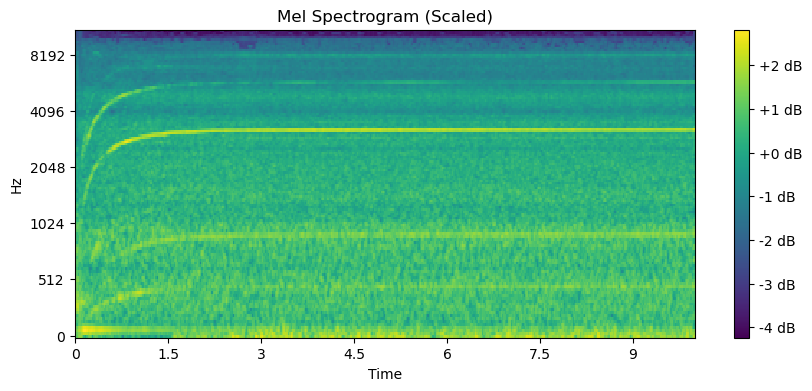

In [11]:
import matplotlib.pyplot as plt

# 可视化梅尔频谱图
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_db_scaled[0, :, :, 0], x_axis='time', y_axis='mel', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram (Scaled)')
plt.show()
